* **
# **1. Introduction**
* **

## **1.1 Background**

This data represents TransJakarta's bus rapid transit (BRT) trip records from April 2023. The dataset explores passenger behavior and their preferences when using TransJakarta as their primary mode of transportation in Jakarta. The data provides insights into travel patterns, payment methods, route popularity, and demographic information of passengers using the TransJakarta system.

## **1.2 Business Problem**
To optimize TransJakarta's service quality and increase ridership, understanding passenger needs is crucial for developing effective service improvements and maintaining customer loyalty. TransJakarta needs to understand how passengers are currently using their services to develop targeted strategies for different user segments. The company wants to answer the following question: **What are the behavior patterns and preferences of passengers using TransJakarta services?**

The analysis will address the following questions:

- What are the peak usage patterns?
- How do passengers prefer to pay for their trips?
- Which routes and stops are most popular, and how can service be optimized on these routes?
- How do different demographic groups use the TransJakarta system?

## **1.3 Data Features**

| Column Name                          | Description                                                                         |
|--------------------------------------|-------------------------------------------------------------------------------------|
| `transID`                            | Unique transaction id for every transaction.                                        |
| `payCardID`                          | Customers main identifier. The card customers use as a ticket for entrance and exit.|
| `payCardBank`                        | Customers card bank issuer name.                                                    |
| `payCardName`                        | Customers name that is embedded in the card.                                        |
| `payCardSex`                         | Customers sex that is embedded in the card.                                         |
| `payCardBirthDate`                   | Customers birth year.                                                               |
| `corridorID`                         | Corridor ID / Route ID as key for route grouping.                                   |
| `corridorName`                       | Corridor Name / Route Name contains Start and Finish for each route.                |
| `direction`                          | 0 for Go, 1 for Back. Direction of the route.                                       |
| `tapInStops`                         | Tap In (entrance) Stops ID for identifying stops name                               |
| `tapInStopsName`                     | Tap In (entrance) Stops Name where customers tap in.                                |
| `tapInStopsLat`                      | Latitude of Tap In Stops                                                            |
| `tapInStopsLon`                      | Longitude of Tap In Stops                                                           |
| `stopStartSeq`                       | Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.               |
| `tapInTime`                          | Time of tap in. Date and time                                                       |
| `tapOutStops`                        | Tap Out (Exit) Stops ID for identifying stops name                                  |
| `tapOutStopsName`                    | Tap out (exit) Stops Name where customers tap out.                                  |
| `tapOutStopsLat`                     | Latitude of Tap Out Stops                                                           |
| `tapOutStopsLon`                     | Longitude of Tap Out Stops                                                          |
| `stopEndSeq`                         | Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.               |
| `tapOutTime`                         | Time of tap out. Date and time                                                      |
| `payAmount`                          | The number of what customers pay.                                                   |

* **
# **2. Data Preparation**
* **

## **2.1. Importing Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import folium
from folium import plugins
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("/Users/faqihasshiddik/Desktop/file.csv/Transjakarta_raw.csv")
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


## **2.2. Data Summary and Structures**

### **2.2.1 Data Overview**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

The datetime format is required for time-based grouping (by hour, day, week, etc.)

In [4]:
df["tapInTime"] = pd.to_datetime(df["tapInTime"])
df["tapOutTime"] = pd.to_datetime(df["tapOutTime"])

In [5]:
df.shape

(37900, 22)

In [6]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [7]:
df_percentage = (df.isnull().sum()/df.shape[0]*100).round(2).astype(str) + "%"
df_percentage

transID              0.0%
payCardID            0.0%
payCardBank          0.0%
payCardName          0.0%
payCardSex           0.0%
payCardBirthDate     0.0%
corridorID          3.32%
corridorName        5.09%
direction            0.0%
tapInStops           3.2%
tapInStopsName       0.0%
tapInStopsLat        0.0%
tapInStopsLon        0.0%
stopStartSeq         0.0%
tapInTime            0.0%
tapOutStops         6.04%
tapOutStopsName     3.55%
tapOutStopsLat      3.55%
tapOutStopsLon      3.55%
stopEndSeq          3.55%
tapOutTime          3.55%
payAmount           2.66%
dtype: object

In [8]:
df.describe(include="all")

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
count,37900,3.790000e+04,37900,37900,37900,37900.000000,36643,35970,37900.000000,36687,37900,37900.000000,37900.000000,37900.000000,37900,35611,36556,36556.000000,36556.000000,36556.000000,36556,36893.000000
unique,37900,NaN,6,1993,2,NaN,221,216,NaN,2570,2602,NaN,NaN,NaN,NaN,2230,2248,NaN,NaN,NaN,NaN,NaN
top,EIIW227B8L34VB,NaN,dki,Fathonah Saefullah,F,NaN,1T,Cibubur - Balai Kota,NaN,P00170,Penjaringan,NaN,NaN,NaN,NaN,P00016,BKN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,18743,80,20157,NaN,400,391,NaN,236,243,NaN,NaN,NaN,NaN,306,316,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.250060e+17,NaN,NaN,NaN,1990.089314,NaN,NaN,0.500633,NaN,NaN,-6.214838,106.841554,13.572480,2023-04-16 08:05:29.462770688,NaN,NaN,-6.214651,106.841233,21.219909,2023-04-16 09:19:44.697997824,2699.712683
min,NaN,6.040368e+10,NaN,NaN,NaN,1946.000000,NaN,NaN,0.000000,NaN,NaN,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,NaN,NaN,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000
25%,NaN,1.800442e+14,NaN,NaN,NaN,1982.000000,NaN,NaN,0.000000,NaN,NaN,-6.245863,106.803470,4.000000,2023-04-10 09:02:15,NaN,NaN,-6.247225,106.801750,11.000000,2023-04-10 10:18:06.249999872,0.000000
50%,NaN,3.507947e+15,NaN,NaN,NaN,1990.000000,NaN,NaN,1.000000,NaN,NaN,-6.214587,106.834830,10.000000,2023-04-16 17:38:42.500000,NaN,NaN,-6.214718,106.834580,18.000000,2023-04-16 19:03:14,3500.000000
75%,NaN,4.699023e+15,NaN,NaN,NaN,2001.000000,NaN,NaN,1.000000,NaN,NaN,-6.175528,106.882270,19.000000,2023-04-22 05:12:02.500000,NaN,NaN,-6.174736,106.883030,29.000000,2023-04-21 23:26:00.249999872,3500.000000
max,NaN,4.997694e+18,NaN,NaN,NaN,2012.000000,NaN,NaN,1.000000,NaN,NaN,-6.089429,107.023950,68.000000,2023-04-30 21:55:41,NaN,NaN,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,20000.000000


In [9]:
df.duplicated().sum()

np.int64(0)

## **2.3 Data Cleaning and Preprocessing**

In [10]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [11]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

#### **Cleaning CorridorID & CorridorName**

In [12]:
corridorIDMap = df.dropna(subset=["corridorID", "corridorName"]).set_index("corridorID")["corridorName"].to_dict()
corridorIDMap

{'5': 'Matraman Baru - Ancol',
 '6C': 'Stasiun Tebet - Karet via Patra Kuningan',
 'R1A': 'Pantai Maju - Kota',
 '11D': 'Pulo Gebang - Pulo Gadung 2 via PIK',
 '12': 'Tanjung Priok - Pluit',
 '1T': 'Cibubur - Balai Kota',
 'JAK.18': 'Kalibata - Kuningan',
 'B14': 'Bekasi Barat - Kuningan',
 '1Q': 'Rempoa - Blok M',
 '5M': 'Kampung Melayu - Tanah Abang via Cikini',
 'M7B': 'BKN - Blok M',
 '9A': 'PGC 2 - Grogol 2',
 '4': 'Pulo Gadung 2 - Tosari',
 'JAK.46': 'Pasar Minggu - Jagakarsa',
 'S22': 'Ciputat - Kampung Rambutan',
 '13': 'Ciledug - Tendean',
 '9E': 'Kebayoran Lama - Jelambar',
 'M9': 'Pinang Ranti - Pluit',
 'JAK.88': 'Terminal Tanjung Priok - Ancol Barat',
 'T11': 'Poris Plawad - Bundaran Senayan',
 'JAK.16': 'Cililitan - Condet',
 '6V': 'Ragunan - Gelora Bung Karno',
 '11Q': 'Kampung Melayu - Pulo Gebang via BKT',
 'JAK.02': 'Kampung Melayu - Duren Sawit',
 '11': 'Pulo Gebang - Matraman',
 '1C': 'Pesanggrahan - Blok M',
 '3B': 'Rusun Flamboyan - Cengkareng',
 'M1': 'Blok M - K

In [13]:
df["corridorName"] = df["corridorName"].fillna(df["corridorID"].map(corridorIDMap))
df["corridorName"]

0                           Matraman Baru - Ancol
1        Stasiun Tebet - Karet via Patra Kuningan
2                              Pantai Maju - Kota
3             Pulo Gebang - Pulo Gadung 2 via PIK
4                           Tanjung Priok - Pluit
                           ...                   
37895           Ragunan - MH Thamrin via Semanggi
37896                      Pinang Ranti - Pramuka
37897                        Cibubur - Balai Kota
37898                 Tanah Abang - Jembatan Lima
37899                           Ciledug - Tendean
Name: corridorName, Length: 37900, dtype: object

In [14]:
df[["corridorName"]].isnull().sum()

corridorName    1125
dtype: int64

In [15]:
corridorNameMap = df.dropna(subset=["corridorID", "corridorName"]).set_index("corridorName")["corridorID"].to_dict()
corridorNameMap

{'Matraman Baru - Ancol': '5',
 'Stasiun Tebet - Karet via Patra Kuningan': '6C',
 'Pantai Maju - Kota': 'R1A',
 'Pulo Gebang - Pulo Gadung 2 via PIK': '11D',
 'Tanjung Priok - Pluit': '12',
 'Cibubur - Balai Kota': '1T',
 'Kalibata - Kuningan': 'JAK.18',
 'Bekasi Barat - Kuningan': 'B14',
 'Rempoa - Blok M': '1Q',
 'Kampung Melayu - Tanah Abang via Cikini': '5M',
 'BKN - Blok M': 'M7B',
 'PGC 2 - Grogol 2': '9A',
 'Pulo Gadung 2 - Tosari': '4',
 'Pasar Minggu - Jagakarsa': 'JAK.46',
 'Ciputat - Kampung Rambutan': 'S22',
 'Ciledug - Tendean': '13',
 'Kebayoran Lama - Jelambar': '9E',
 'Pinang Ranti - Pluit': '9',
 'Terminal Tanjung Priok - Ancol Barat': 'JAK.88',
 'Poris Plawad - Bundaran Senayan': 'T11',
 'Cililitan - Condet': 'JAK.16',
 'Ragunan - Gelora Bung Karno': '6V',
 'Kampung Melayu - Pulo Gebang via BKT': '11Q',
 'Kampung Melayu - Duren Sawit': 'JAK.02',
 'Pulo Gebang - Matraman': '11',
 'Pesanggrahan - Blok M': '1C',
 'Rusun Flamboyan - Cengkareng': '3B',
 'Blok M - Kota': '

In [16]:
df["corridorID"] = df["corridorID"].fillna(df["corridorName"].map(corridorNameMap))
df["corridorID"]

0             5
1            6C
2           R1A
3           11D
4            12
          ...  
37895        6B
37896        9N
37897        1T
37898    JAK.13
37899        13
Name: corridorID, Length: 37900, dtype: object

In [17]:
df[["corridorID"]].isnull().sum()

corridorID    1125
dtype: int64

#### **Cleaning TapInStops & TapInStopsName**

In [18]:
df[["tapInStops", "tapInStopsName"]].isnull().sum()

tapInStops        1213
tapInStopsName       0
dtype: int64

In [19]:
tapInStopsMap = df.dropna(subset = ["tapInStops", "tapInStopsName"]).set_index("tapInStopsName")["tapInStops"].to_dict()
tapInStopsMap

{'Pal Putih': 'P00142',
 'Kemenkes 2': 'B01963P',
 'Gg. Kunir II': 'B00499P',
 'Taman Elok 1': 'B05587P',
 'Sunter Boulevard Barat': 'P00239',
 'Benhil 3': 'B00127P',
 'Cervino Village': 'B00243P',
 'SDN Pondok Labu 11': 'B03416P',
 'Imperium': 'B00795P',
 'TPU Bungur': 'B05781P',
 'Pegangsaan Timur': 'B05433P',
 'Tendean': 'P00254',
 'Slipi Petamburan Arah Selatan': 'P00281',
 'Pasar Rumput': 'P00159',
 'Gelanggang Remaja Pasar Minggu': 'B00608P',
 'SMK Darussalam': 'B05291P',
 'JORR': 'P00096',
 'Apartemen Simprug Teras': 'B00058P',
 'Jembatan Tiga Arah Utara': 'P00093',
 'Gunung Sahari Mangga Dua Timur': 'B00722P',
 'RS Harapan Kita Arah Utara': 'P00206',
 'Tirtayasa': 'P00259',
 'Masjid Jami At Taqwa 2': 'B02335P',
 'Simpang Pahlawan Revolusi 1': 'B05023P',
 'St. Jatinegara 2': 'P00233',
 'Univ. Moestopo Bintaro': 'B05833P',
 'Jln. Kayu Besar Dalam': 'B06299P',
 'Pantai Maju': 'B06040P',
 'Polda Metro Jaya': 'P00183',
 '18 Office Park': 'B00001P',
 'Phe Tower Kebagusan': 'B02831P',

In [20]:
df["tapInStops"] = df["tapInStops"].fillna(df["tapInStopsName"].map(tapInStopsMap))
df["tapInStops"]

0         P00142
1        B01963P
2        B00499P
3        B05587P
4         P00239
          ...   
37895     P00261
37896     P00064
37897    B02873P
37898    B02505P
37899     P00001
Name: tapInStops, Length: 37900, dtype: object

In [21]:
df[["tapInStops", "tapInStopsName"]].isnull().sum()

tapInStops        34
tapInStopsName     0
dtype: int64

#### **Cleaning TapOutStops & TapOutStopsName**

In [22]:
df[["tapOutStops", "tapOutStopsName"]].isnull().sum()

tapOutStops        2289
tapOutStopsName    1344
dtype: int64

In [23]:
tapOutStopsMap = df.dropna(subset = ["tapOutStops", "tapOutStopsName"]).set_index("tapOutStopsName")["tapOutStops"].to_dict()
tapOutStopsMap

{'Tegalan': 'P00253',
 'Sampoerna Strategic': 'B03307P',
 'Simpang Kunir Kemukus': 'B04962P',
 'Raya Penggilingan': 'B03090P',
 'Kali Besar Barat': 'P00098',
 'Grand Sahid': 'B00694P',
 'Jln. Baros': 'B00899P',
 'Kayuringin 2': 'B01853P',
 'Blok M Jalur 3': 'B06578P',
 'Matraman 4': 'B02387P',
 'Mampang Prapatan': 'P00129',
 'Semanggi': 'P00216',
 'Matraman 2': 'P00135',
 'Jln. Gabus Raya': 'B01062P',
 'Pusdiklat Kemenag 1': 'B03032P',
 'Adam Malik': 'P00001',
 'Pasar Kebayoran Lama': 'P00155',
 'Pancoran Tugu Arah Barat': 'P00145',
 'Jln. Ancol Barat 6': 'B05989P',
 'Term. Poris Plawad': 'B05720P',
 'Jln. Mesjid Al Mabruk': 'B01393P',
 'Masjid Agung': 'P00133',
 'SMAN 100': 'B05256P',
 'RS Duren Sawit 2': 'B03135P',
 'Jatinegara RS Premier': 'P00086',
 'Bintaro Park VIew': 'B00147P',
 'Mall Taman Palem 3': 'B02195P',
 'SD Diakonia 1': 'B03322P',
 'Karet Sudirman': 'P00104',
 'Plaza Oleos': 'B02868P',
 'Bundaran Senayan 1': 'B00221P',
 'Kuningan Timur': 'P00121',
 'Sbr. Jembatan Sukamu

In [24]:
df["tapOutStops"] = df["tapOutStops"].fillna(df["tapOutStopsName"].map(tapOutStopsMap))
df["tapOutStops"]

0         P00253
1        B03307P
2        B04962P
3        B03090P
4         P00098
          ...   
37895     P00228
37896     P00179
37897    B00226P
37898    B01787P
37899     P00106
Name: tapOutStops, Length: 37900, dtype: object

In [25]:
df[["tapOutStops", "tapOutStopsName"]].isnull().sum()

tapOutStops        1363
tapOutStopsName    1344
dtype: int64

In [26]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

#### **Updated CorridorName with Updated TapInStops**

In [27]:
corridorTapInMap = df.dropna(subset = ["corridorName", "tapInStops"]).set_index("tapInStops")["corridorName"].to_dict()
corridorTapInMap

{'P00142': 'Matraman Baru - Ancol',
 'B01963P': 'Bekasi Barat - Kuningan',
 'B00499P': 'JIS - Terminal Muara Angke',
 'B05587P': 'Rusun Rawa Bebek - Kodamar',
 'P00239': 'Sunter Boulevard Barat - Penjaringan',
 'B00127P': 'Stasiun Palmerah - Tosari',
 'B00243P': 'Stasiun Tebet - Karet via Underpass',
 'B00795P': 'Bekasi Barat - Kuningan',
 'B05781P': 'Rempoa - Blok M',
 'B05433P': 'Senen - Lebak Bulus',
 'P00254': 'Puri Beta - Pancoran Barat',
 'P00281': 'Poris Plawad - Bundaran Senayan',
 'P00159': 'Pulo Gadung 2 - Dukuh Atas 2',
 'B00608P': 'Pasar Minggu - Jagakarsa',
 'B05291P': 'Ciputat - Kampung Rambutan',
 'P00096': 'Ciledug - Tendean',
 'B00058P': 'Kebayoran Lama - Jelambar',
 'P00093': 'Pinang Ranti - Pluit',
 'B00722P': 'Terminal Tanjung Priok - Ancol Barat',
 'P00206': 'Poris Plawad - Bundaran Senayan',
 'B02144P': 'Cililitan - Condet',
 'P00259': 'Puri Beta - Ragunan',
 'B02335P': 'Kampung Melayu - Pulo Gebang via BKT',
 'B05023P': 'Kampung Melayu - Duren Sawit',
 'P00233': 

In [28]:
df["corridorName"] = df["corridorName"].fillna(df["tapInStops"].map(corridorTapInMap))
df["corridorName"]

0                           Matraman Baru - Ancol
1        Stasiun Tebet - Karet via Patra Kuningan
2                              Pantai Maju - Kota
3             Pulo Gebang - Pulo Gadung 2 via PIK
4                           Tanjung Priok - Pluit
                           ...                   
37895           Ragunan - MH Thamrin via Semanggi
37896                      Pinang Ranti - Pramuka
37897                        Cibubur - Balai Kota
37898                 Tanah Abang - Jembatan Lima
37899                           Ciledug - Tendean
Name: corridorName, Length: 37900, dtype: object

In [29]:
df[["corridorName"]].isnull().sum()

corridorName    33
dtype: int64

In [30]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

#### **Updated CorridorID with Updated CorridorName**

In [31]:
corridorNameMap = df.dropna(subset = ["corridorID", "corridorName"]).set_index("corridorName")["corridorID"].to_dict()
corridorNameMap

{'Matraman Baru - Ancol': '5',
 'Stasiun Tebet - Karet via Patra Kuningan': '6C',
 'Pantai Maju - Kota': 'R1A',
 'Pulo Gebang - Pulo Gadung 2 via PIK': '11D',
 'Tanjung Priok - Pluit': '12',
 'Cibubur - Balai Kota': '1T',
 'Kalibata - Kuningan': 'JAK.18',
 'Bekasi Barat - Kuningan': 'B14',
 'Rempoa - Blok M': '1Q',
 'Kampung Melayu - Tanah Abang via Cikini': '5M',
 'BKN - Blok M': 'M7B',
 'PGC 2 - Grogol 2': '9A',
 'Pulo Gadung 2 - Tosari': '4',
 'Pasar Minggu - Jagakarsa': 'JAK.46',
 'Ciputat - Kampung Rambutan': 'S22',
 'Ciledug - Tendean': '13',
 'Kebayoran Lama - Jelambar': '9E',
 'Pinang Ranti - Pluit': '9',
 'Terminal Tanjung Priok - Ancol Barat': 'JAK.88',
 'Poris Plawad - Bundaran Senayan': 'T11',
 'Cililitan - Condet': 'JAK.16',
 'Ragunan - Gelora Bung Karno': '6V',
 'Kampung Melayu - Pulo Gebang via BKT': '11Q',
 'Kampung Melayu - Duren Sawit': 'JAK.02',
 'Pulo Gebang - Matraman': '11',
 'Pesanggrahan - Blok M': '1C',
 'Rusun Flamboyan - Cengkareng': '3B',
 'Blok M - Kota': '

In [32]:
df["corridorID"] = df["corridorID"].fillna(df["corridorName"].map(corridorNameMap))
df["corridorID"]

0             5
1            6C
2           R1A
3           11D
4            12
          ...  
37895        6B
37896        9N
37897        1T
37898    JAK.13
37899        13
Name: corridorID, Length: 37900, dtype: object

In [33]:
df[["corridorName"]].isnull().sum()

corridorName    33
dtype: int64

In [34]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

#### **Cleaning PayAmount with Updated CorridorID & Updated CorridorName**

In [35]:
df["payAmount"].unique()

array([ 3500., 20000.,     0.,    nan])

**Tariff Vehicle Type**

    - Mikrotrans = 0
    - BRT = 3500
    - Royal Trans = 20000

In [36]:
mikroTransID = df[df["payAmount"] == 0]["corridorID"].unique()
mikroTransID

array(['JAK.18', 'JAK.03', 'JAK.46', 'JAK.88', 'JAK.16', 'JAK.02', '3B',
       'BW9', 'JAK.15', 'JAK.112', 'JAK.43B', 'JAK.42', 'JAK.36',
       'JAK.06', 'JAK.14', '3A', '3C', 'JAK.71', 'JAK.77', 'JAK.44',
       'JAK.19', 'JAK.75', 'JAK.52', 'JAK.37', 'JAK.31', '11M', 'JAK.43C',
       '2F', 'JAK.117', 'JAK.49', 'JAK.20', 'JAK.118', 'JAK.27', '4E',
       'JAK.13', 'JAK.84', '2H', 'JAK.08', 'JAK.23', 'JAK.07', 'JAK.22',
       'JAK.115', 'JAK.21', 'JAK.26', 'JAK.64', 'JAK.47', '12C', 'JAK.01',
       'JAK.120', 'JAK.85', '11N', 'JAK.10', '2E', 'JAK.41', 'JAK.86',
       '9F', '11P', 'JAK.73', 'JAK.32', 'JAK.50', 'JAK.29', 'JAK.45',
       'JAK.110A', 'JAK.51', 'JAK.54', 'JAK.25', 'JAK.30', 'JAK.39',
       'JAK.80', 'JAK.11', 'JAK.17', '11K', '10B', '9', '2B', '1P', '6D',
       '1N', '14', 'M7B', '7A', '11D', 'JAK.58', '8C', 'JAK.34', '1H',
       '10A', 'JAK.72', 'JAK.74', 'JAK.40', 'JAK.60', 'JAK.56', 'JAK.59',
       'JAK.113', 'JAK.04', 'JAK.38', '12F', 'JAK.61', 'JAK.24', '11C

In [37]:
mikroTransName = df[df["payAmount"] == 0]["corridorName"].unique()
mikroTransName

array(['Kalibata - Kuningan', 'Lebak Bulus - Andara',
       'Pasar Minggu - Jagakarsa', 'Terminal Tanjung Priok - Ancol Barat',
       'Cililitan - Condet', 'Kampung Melayu - Duren Sawit',
       'Rusun Flamboyan - Cengkareng', 'Monas - Pantai Indah Kapuk',
       'Bulak Turi - Tanjung Priok', 'Terminal Tanah Merah - Pulo Gadung',
       'Tongtek - Tebet Eco Park (TEP) - Cililitan',
       'Kampung Melayu - Pondok Kelapa', 'Cilangkap - Cililitan',
       'Kampung Rambutan - Pondok Gede', 'Tanah Abang - Meruya',
       'Rusun Pesakih - Kalideres', 'Rusun Kapuk Muara - Penjaringan',
       'Kampung Rambutan - Pinang Ranti', 'Tanjung Priok - Jembatan Item',
       'Andara - Stasiun Universitas Pancasila',
       'Pinang Ranti - Kampung Rambutan', 'Cililitan - Kp. Pulo',
       'Terminal Kalideres - Terminal Muara Angke',
       'Cililitan - Condet via Kayu Manis', 'Blok M - Andara',
       'Rusun Rawa Bebek - Bukit Duri',
       'Sarana Jaya - Tebet Eco Park (TEP) - Stasiun Cawang',
    

In [38]:
brtID = df[df["payAmount"] == 3500]["corridorID"].unique()
brtID

array(['5', '6C', 'R1A', '11D', '12', '1Q', '5M', '9A', '4', 'S22', '13',
       '9E', 'M9', 'T11', '6V', '11Q', '11', '1C', 'M1', '7E', '1P', '7D',
       '6H', '14', 'JIS3', '2', '6N', 'M11', '9N', '7P', '13B', 'M7',
       '12A', '9D', '1', 'M8', 'B21', 'M3', '8K', 'M10', '10D', 'B11',
       '8C', 'M2', '12B', '5D', '7A', '7Q', '1M', '5C', '6Q', '8E', '6M',
       'L13E', '12P', '1F', '13C', '4B', '7C', '2A', '8A', '1E', 'M4',
       '9H', '13D', '5N', '6T', '5F', '3F', '2P', 'S21', 'M12', '1N',
       'S11', '6U', '10', '2B', '10K', '6A', '4F', '6B', '5B', '3', 'M6',
       '8', '6D', 'JAK.28', 'M7B', '7F', 'B13', '6', '2E', '9C', 'D21',
       'JAK.33', '4D', '1K', 'M13', '1A', 'JAK.48A', '1R', '3H', 'D32',
       '4C', '7', '1B', 'S12', 'JAK.23', '8D', '7B', 'JAK.118', '1H',
       'D11', '8M', '12H', '10H', '3E', '9', 'JAK.39', '11K', 'JAK.07',
       '11P', 'JAK.88', '10A', 'JAK.84', 'JAK.52', 'BW9', '2Q', 'JAK.77',
       'M1H', 'JAK.60', '1T', 'JAK.49', 'JAK.30', 'M5', 'JAK.

There is an anomalies in payAmount of 3500, but in the corridorID having unique ID of "JAK"

In [39]:
df.loc[df["corridorID"].str.contains("JAK", na = False), "payAmount"] = 0

In [40]:
mikroTransID = df[df["payAmount"] == 0]["corridorID"].unique()
mikroTransID

array(['JAK.18', 'JAK.03', 'JAK.46', 'JAK.88', 'JAK.16', 'JAK.02', '3B',
       'BW9', 'JAK.15', 'JAK.112', 'JAK.43B', 'JAK.42', 'JAK.36',
       'JAK.06', 'JAK.14', '3A', '3C', 'JAK.71', 'JAK.77', 'JAK.44',
       'JAK.48B', 'JAK.19', 'JAK.75', 'JAK.52', 'JAK.37', 'JAK.31', '11M',
       'JAK.43C', '2F', 'JAK.117', 'JAK.49', 'JAK.20', 'JAK.118',
       'JAK.27', '4E', 'JAK.13', 'JAK.84', '2H', 'JAK.08', 'JAK.23',
       'JAK.07', 'JAK.22', 'JAK.115', 'JAK.21', 'JAK.26', 'JAK.64',
       'JAK.47', '12C', 'JAK.01', 'JAK.120', 'JAK.85', '11N', 'JAK.10',
       '2E', 'JAK.41', 'JAK.86', '9F', '11P', 'JAK.73', 'JAK.32',
       'JAK.50', 'JAK.29', 'JAK.48A', 'JAK.45', 'JAK.110A', 'JAK.51',
       'JAK.54', 'JAK.25', 'JAK.30', 'JAK.39', 'JAK.80', 'JAK.11',
       'JAK.17', '11K', '10B', 'JAK.28', '9', '2B', '1P', '6D', '1N',
       '14', 'JAK.33', 'M7B', '7A', '11D', 'JAK.58', '8C', 'JAK.34', '1H',
       '10A', 'JAK.72', 'JAK.74', 'JAK.40', 'JAK.60', 'JAK.56', 'JAK.59',
       'JAK.113', 'J

In [41]:
brtID = df[df["payAmount"] == 3500]["corridorID"].unique()
brtID

array(['5', '6C', 'R1A', '11D', '12', '1Q', '5M', '9A', '4', 'S22', '13',
       '9E', 'M9', 'T11', '6V', '11Q', '11', '1C', 'M1', '7E', '1P', '7D',
       '6H', '14', 'JIS3', '2', '6N', 'M11', '9N', '7P', '13B', 'M7',
       '12A', '9D', '1', 'M8', 'B21', 'M3', '8K', 'M10', '10D', 'B11',
       '8C', 'M2', '12B', '5D', '7A', '7Q', '1M', '5C', '6Q', '8E', '6M',
       'L13E', '12P', '1F', '13C', '4B', '7C', '2A', '8A', '1E', 'M4',
       '9H', '13D', '5N', '6T', '5F', '3F', '2P', 'S21', 'M12', '1N',
       'S11', '6U', '10', '2B', '10K', '6A', '4F', '6B', '5B', '3', 'M6',
       '8', '6D', 'M7B', '7F', 'B13', '6', '2E', '9C', 'D21', '4D', '1K',
       'M13', '1A', '1R', '3H', 'D32', '4C', '7', '1B', 'S12', '8D', '7B',
       '1H', 'D11', '8M', '12H', '10H', '3E', '9', '11K', '11P', '10A',
       'BW9', '2Q', 'M1H', '1T', 'M5', nan], dtype=object)

In [42]:
brtName = df[df["payAmount"] == 3500]["corridorName"].unique()
brtName

array(['Matraman Baru - Ancol',
       'Stasiun Tebet - Karet via Patra Kuningan', 'Pantai Maju - Kota',
       'Pulo Gebang - Pulo Gadung 2 via PIK', 'Tanjung Priok - Pluit',
       'Rempoa - Blok M', 'Kampung Melayu - Tanah Abang via Cikini',
       'PGC 2 - Grogol 2', 'Pulo Gadung 2 - Tosari',
       'Ciputat - Kampung Rambutan', 'Ciledug - Tendean',
       'Kebayoran Lama - Jelambar', 'Pinang Ranti - Pluit',
       'Poris Plawad - Bundaran Senayan', 'Ragunan - Gelora Bung Karno',
       'Kampung Melayu - Pulo Gebang via BKT', 'Pulo Gebang - Matraman',
       'Pesanggrahan - Blok M', 'Blok M - Kota',
       'Kampung Rambutan - Ragunan', 'Senen - Blok M',
       'Pancoran - Kampung Rambutan', 'Senen - Lebak Bulus',
       'Jakarta International Stadium - Senen',
       'Harmoni - Jakarta International Stadium', 'Pulo Gadung - Monas',
       'Ragunan - Blok M via Kemang', 'Pulo Gebang - Pulo Gadung 2',
       'Pinang Ranti - Pramuka', 'Pondok Kelapa - BKN',
       'Puri Beta - Pancora

In [43]:
royalTransID = df[df["payAmount"] == 20000]["corridorID"].unique()
royalTransID

array(['1T', 'B14', 'T21', 'D32', 'S31', '1R', '1P', '9D', '7C', 'B13',
       'D31', '1K', '6P', 'S12', '1N'], dtype=object)

In [44]:
royalTransName = df[df["payAmount"] == 20000]["corridorName"].unique()
royalTransName

array(['Cibubur - Balai Kota', 'Bekasi Barat - Kuningan',
       'Palem Semi - Bundaran Senayan', 'Cinere - Bundaran Senayan',
       'Bintaro - Fatmawati', 'Senen - Tanah Abang', 'Senen - Blok M',
       'Pasar Minggu - Tanah Abang', 'Cibubur - BKN',
       'Bekasi Barat - Blok M', 'Cinere - Kuningan',
       'Cibubur Junction - Blok M', 'Cibubur - Kuningan',
       'BSD Serpong - Fatmawati', 'Tanah Abang - Blok M'], dtype=object)

In [45]:
df["payAmount"] = np.where(df['corridorID'].isin(mikroTransID) & df["corridorName"].isin(mikroTransName), 0, df["payAmount"])
df["payAmount"] = np.where(df['corridorID'].isin(brtID) & df["corridorName"].isin(brtName), 3500, df["payAmount"])
df["payAmount"] = np.where(df['corridorID'].isin(royalTransID) & df["corridorName"].isin(royalTransName), 20000, df["payAmount"])

In [46]:
df["payAmount"].value_counts()

payAmount
3500.0     19408
0.0        15848
20000.0     2644
Name: count, dtype: int64

In [47]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
dtype: int64

In [48]:
df.dropna(inplace = True)

## **2.4 Exporting Clean Data**

In [49]:
df.to_csv("Transjakarta_clean.csv", index = False)

* **
# **3. Data Analysis & Insight**
* **

## **3.1 Passenger Patterns**

### **3.1.1 Peak Hours and Frequency**

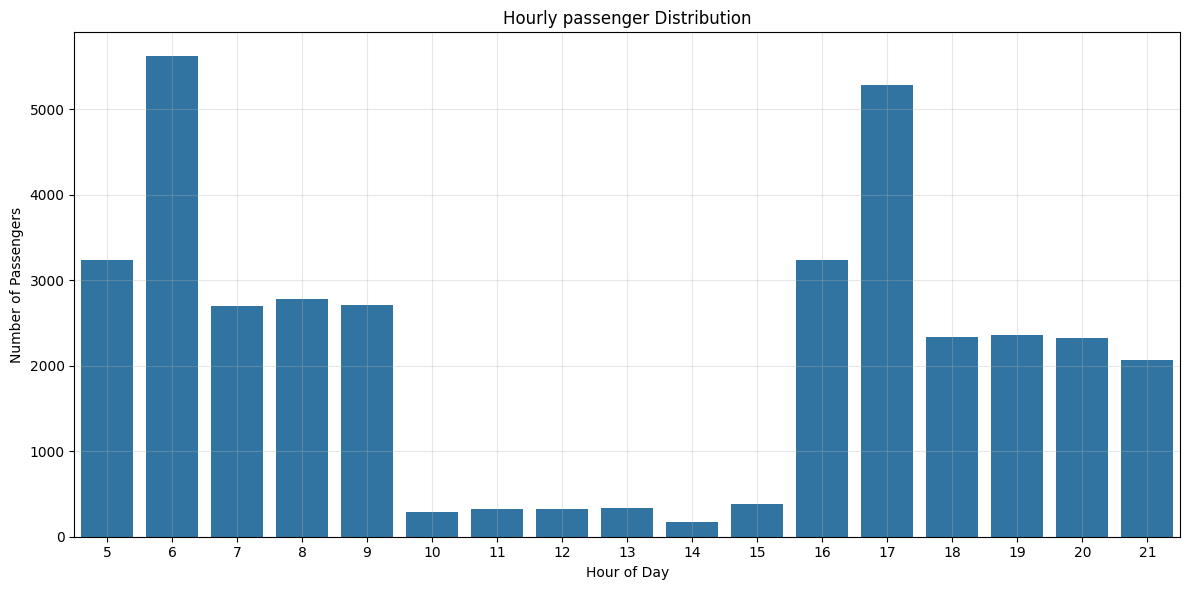


passenger Distribution:

Morning Peak (6-9 AM): 13805 passengers
Evening Peak (4-7 PM): 13212 passengers
Off-Peak (10 AM-3 PM): 1832 passengers


In [50]:
# Extract hour from tapInTime
df['hour'] = df['tapInTime'].dt.hour

# Analyze hourly patterns
hourly_passenger = df.groupby('hour').size()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x = hourly_passenger.index, y = hourly_passenger.values)
plt.title('Hourly passenger Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Passengers')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate peak vs off-peak statistics
peak_morning = df[df['hour'].between(6, 9)].shape[0]
peak_evening = df[df['hour'].between(16, 19)].shape[0]
off_peak = df[df['hour'].between(10, 15)].shape[0]

print("\npassenger Distribution:\n")
print(f"Morning Peak (6-9 AM): {peak_morning} passengers")
print(f"Evening Peak (4-7 PM): {peak_evening} passengers")
print(f"Off-Peak (10 AM-3 PM): {off_peak} passengers")

morning_peak = df[df['hour'].between(6, 9)]['tapInStopsName'].value_counts()
evening_peak = df[df['hour'].between(16, 19)]['tapInStopsName'].value_counts()

There are two distinct peak periods:

- Morning Peak (6-9 AM): Shows the highest passenger with approximately 13,885 passengers, with hour 6 (6 AM) having the highest single-hour passenger around 5,500 passengers
- Evening Peak (4-7 PM): Has the second-highest passenger with 13,212 passengers, with hour 17 (5 PM) showing the highest volume during this period

On the important note, there's a significant drop in passenger during mid-day hours (10 AM - 3 PM) with only 1,832 passengers during these off-peak hours
The lowest passenger occurs around hour 14 (2 PM) with fewer than 500 passengers

### **3.1.2 Popular Routes and Corridor**

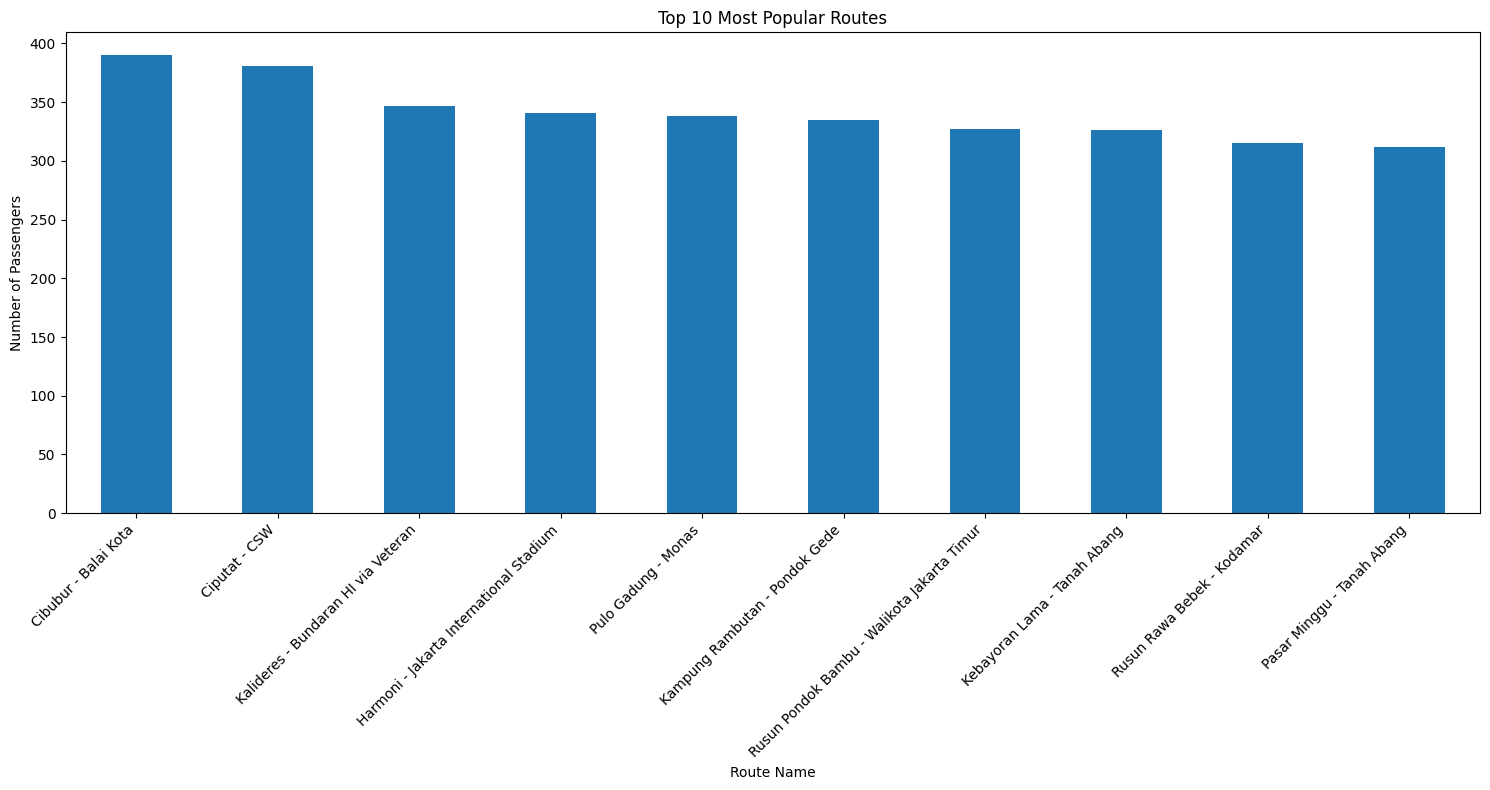

Total Routes: 216

Top 5 Most Popular Routes:
Cibubur - Balai Kota: 390 passengers
Ciputat - CSW: 381 passengers
Kalideres - Bundaran HI via Veteran: 347 passengers
Harmoni - Jakarta International Stadium: 341 passengers
Pulo Gadung - Monas: 338 passengers


In [51]:
# Route popularity analysis
route_passenger = df.groupby('corridorName').size().sort_values(ascending=False)

# Visualize top 10 routes
plt.figure(figsize=(15, 8))
route_passenger.head(10).plot(kind='bar')
plt.title('Top 10 Most Popular Routes')
plt.xlabel('Route Name')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Total Routes: {len(route_passenger)}")
print("\nTop 5 Most Popular Routes:")
for route, count in route_passenger.head().items():
    print(f"{route}: {count} passengers")

- "Cibubur - Balai Kota" is the most popular route with approximately 390 passengers 
- "Cibinong - CSW" is the second most popular with around 380 passengers
- "Kalideres - Bundaran HI via Veteran" is third with about 345 passengers 
- The difference between the most popular (390 passengers) and least popular (around 310 passengers) in the top 10 is relatively small, suggesting consistent high usage across these major routes

### **3.1.3 Weekly passenger Patterns**

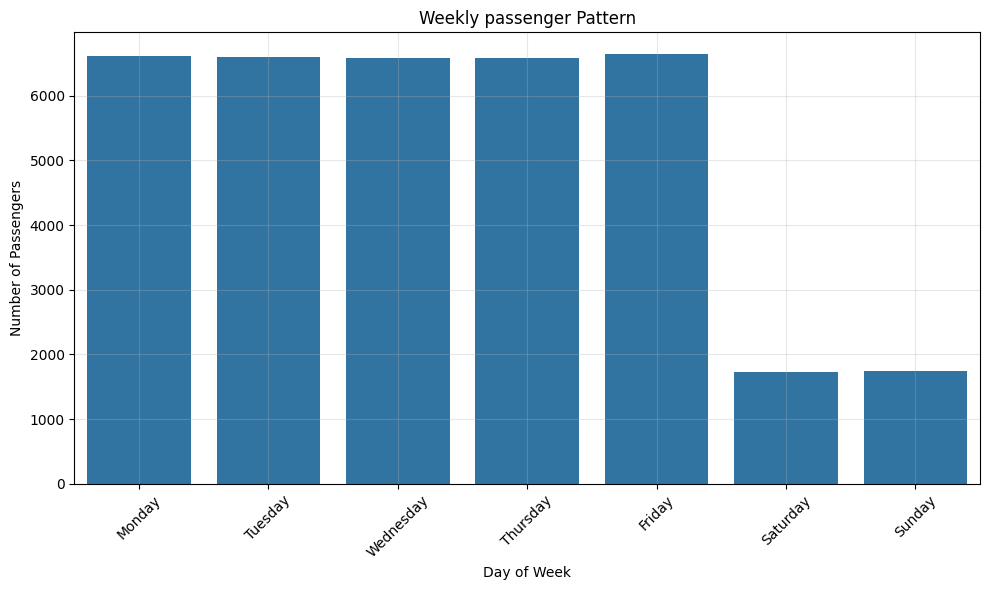

In [52]:
# Add day of week
df['day_of_week'] = df['tapInTime'].dt.day_name()
df['date'] = df['tapInTime'].dt.date

# Weekly pattern analysis
weekly_passenger = df.groupby('day_of_week').size()

# Reorder days for better visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_passenger = weekly_passenger.reindex(day_order)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_passenger.index, y=weekly_passenger.values)
plt.title('Weekly passenger Pattern')
plt.xlabel('Day of Week')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout();

Weekdays (Monday through Friday) show consistently high passenger around 6,000-6,500 passengers per day. While the weekend passenger (Saturday and Sunday) drops dramatically to about 1,500-2,000 passengers, roughly 75% lower than weekday volumes

### **3.1.4 Service Type Distribution**

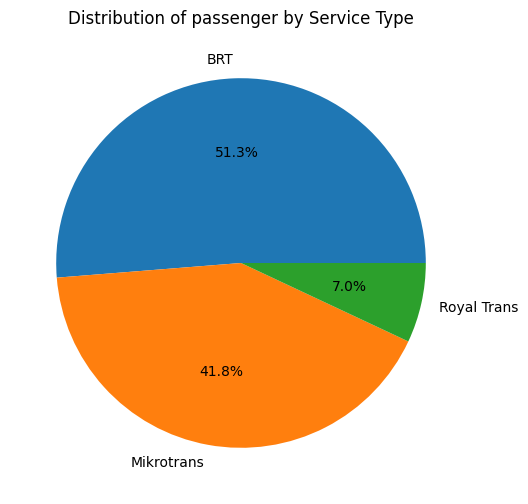


Service Type Distribution:

BRT: 18698 passengers (51.3%)
Mikrotrans: 15231 passengers (41.8%)
Royal Trans: 2545 passengers (7.0%)


In [53]:
# Analyze passenger by service type (based on payAmount)
service_mapping = {0: 'Mikrotrans', 3500: 'BRT', 20000: 'Royal Trans'}
df['service_type'] = df['payAmount'].map(service_mapping)

# Service type distribution
plt.figure(figsize=(8, 6))
service_dist = df['service_type'].value_counts()
plt.pie(service_dist.values, labels=service_dist.index, autopct='%1.1f%%')
plt.title('Distribution of passenger by Service Type')
plt.show()

print("\nService Type Distribution:\n")
for service, count in service_dist.items():
    print(f"{service}: {count} passengers ({count/len(df)*100:.1f}%)")

- BRT (Bus Rapid Transit) is clearly the dominant mode of transportation, serving 18,698 passengers and accounting for 51.3% of all rides. 
- Mikrotrans is the second most used service, handling 15,231 passengers (41.8%). 
- Royal Trans has a notably smaller share at 7.0% (2,545 passengers)

There's a clear inverse relationship between fare price and usage. Despite being free, TransMikro isn't the most used service, suggesting other factors (like routes and convenience) influence passenger. The high-priced Royal Trans has predictably lower usage, likely positioning itself as a premium service

### **3.1.5 Most Frequented Stops**

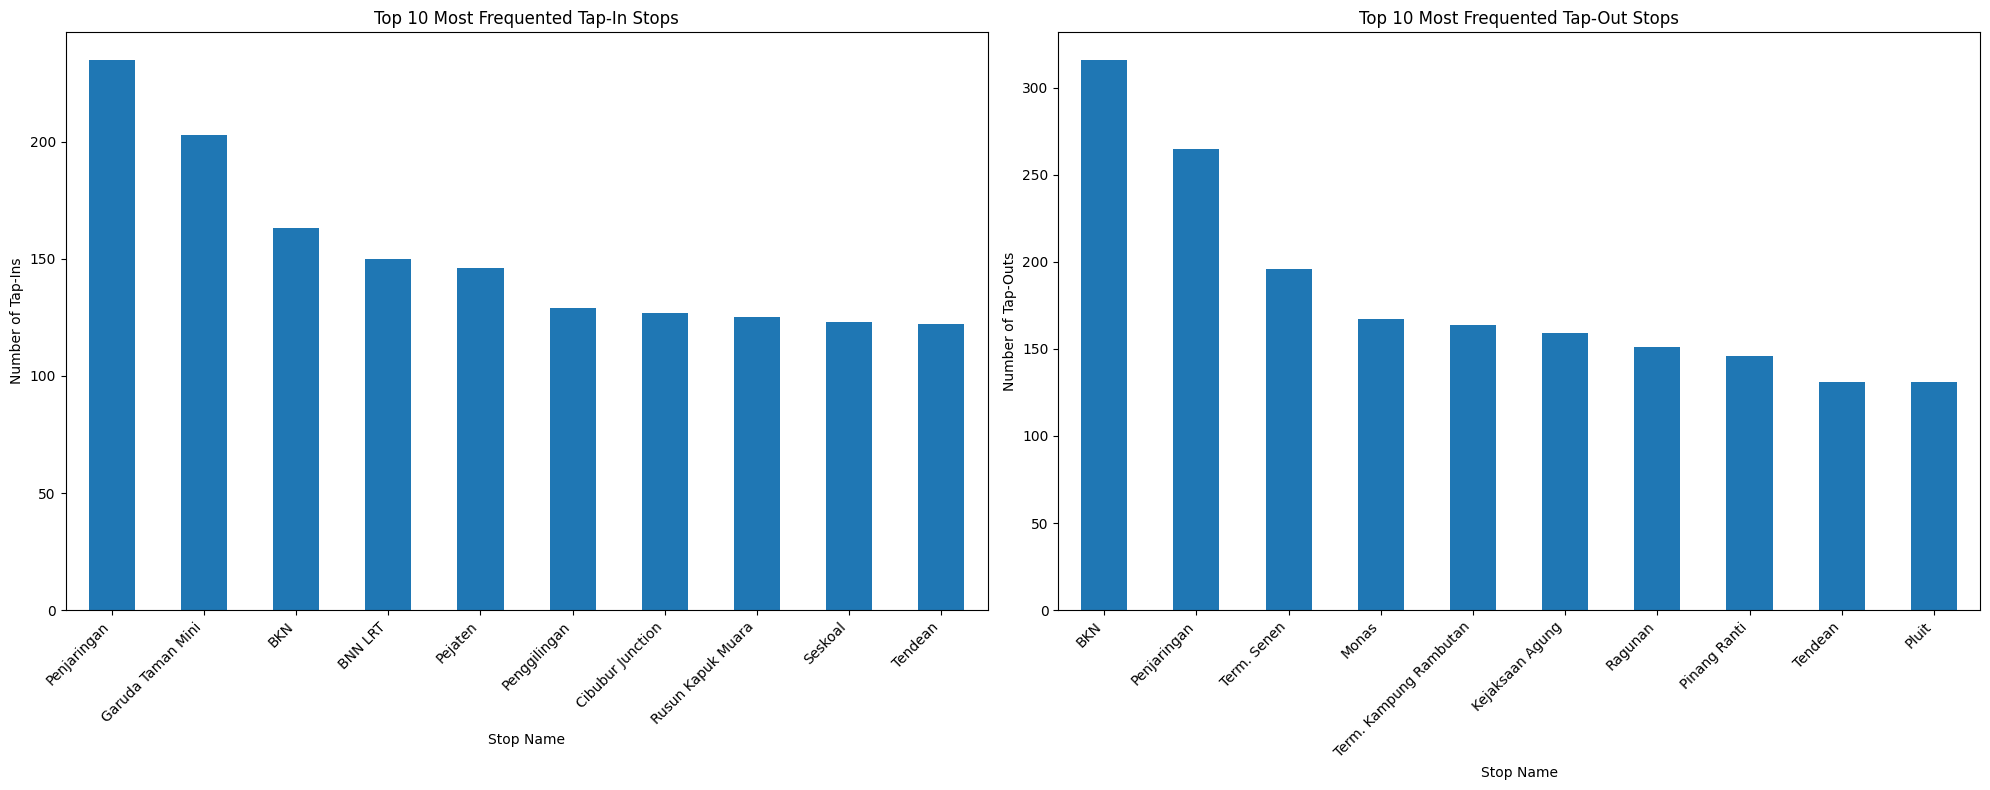


Top 10 Most Frequented Tap-In Stops:

tapInStopsName
Penjaringan          235
Garuda Taman Mini    203
BKN                  163
BNN LRT              150
Pejaten              146
Penggilingan         129
Cibubur Junction     127
Rusun Kapuk Muara    125
Seskoal              123
Tendean              122
Name: count, dtype: int64

Top 10 Most Frequented Tap-Out Stops:

tapOutStopsName
BKN                       316
Penjaringan               265
Term. Senen               196
Monas                     167
Term. Kampung Rambutan    164
Kejaksaan Agung           159
Ragunan                   151
Pinang Ranti              146
Tendean                   131
Pluit                     131
Name: count, dtype: int64


In [54]:
# Analyze tap-in stops
tapin_freq = df['tapInStopsName'].value_counts()
tapout_freq = df['tapOutStopsName'].value_counts()

plt.figure(figsize=(20, 8))
# Plot top 10 most frequented tap-in stops
plt.subplot(1,2,1)
tapin_freq.head(10).plot(kind='bar')
plt.title('Top 10 Most Frequented Tap-In Stops')
plt.xlabel('Stop Name')
plt.ylabel('Number of Tap-Ins')
plt.xticks(rotation=45, ha='right')

# Plot top 10 most frequented tap-out stops
plt.subplot(1,2,2)
tapout_freq.head(10).plot(kind='bar')
plt.title('Top 10 Most Frequented Tap-Out Stops')
plt.xlabel('Stop Name')
plt.ylabel('Number of Tap-Outs')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\nTop 10 Most Frequented Tap-In Stops:\n")
print(tapin_freq.head(10))
print("\nTop 10 Most Frequented Tap-Out Stops:\n")
print(tapout_freq.head(10))

For the Tap-In Stops (left chart):

- Penjaringan is the most frequented tap-in location with approximately 235 taps
- Garuda Taman Mini is the second most popular with about 203 taps
- The remaining stops show a gradual decrease in frequency
- The least frequented among the top 10 is "Terusan" with around 120 taps

For the Tap-Out Stops (right chart):

- BKN (likely an abbreviation for a station name) is the most popular destination with about 310 tap-outs
- Penjaringan is the second most frequent tap-out location with roughly 260 tap-outs
- Similar to the tap-in chart, there's a declining pattern in frequency
- The least frequented tap-out stops (Pool and the stop before it) have around 130 tap-outs

## **3.2 Demographic Analysis**


### **3.2.1 Age distribution of passengers (using payCardBirthDate)**

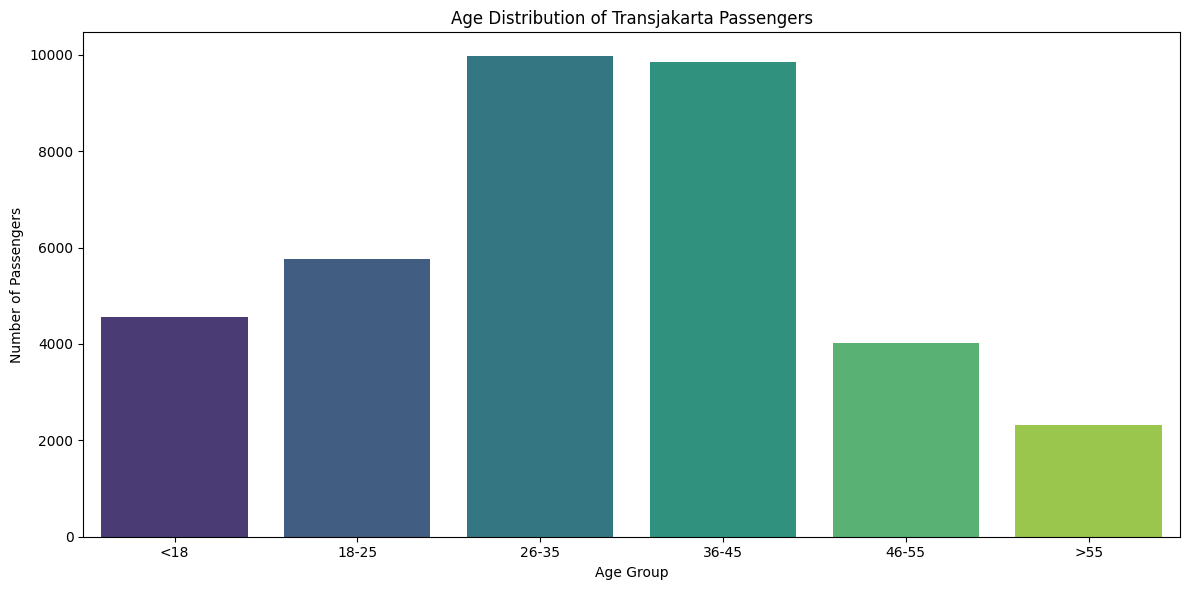

In [55]:
current_year = 2023
df['age'] = current_year - df['payCardBirthDate']

# Create age groups
bins = [0, 17, 25, 35, 45, 55, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '>55']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Plot age distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age_group', palette='viridis')
plt.title('Age Distribution of Transjakarta Passengers')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.tight_layout();


- The 26-35 and 36-45 age groups are the largest user segments, each with nearly 10,000 passengers. These two groups combined represent the core working-age population, suggesting Transjakarta is primarily used for commuting
- There's a gradual increase from younger to middle-age groups, then a sharp decline after age 45. Passenger among those >55 is the lowest, at around 2,000 passengers
- The 18-25 age group, likely representing students and young professionals, has higher passenger (around 5,800 passengers)

### **3.2.2 Weekly Passenger Pattern by Age**

<Figure size 1500x800 with 0 Axes>

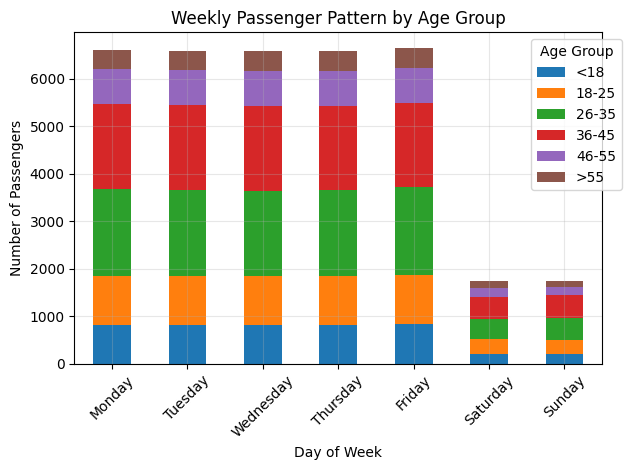

In [56]:
# Set up the day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create figure for weekly patterns
plt.figure(figsize=(15, 8))

# Weekly pattern by age group
weekly_age_passenger = pd.crosstab(df['day_of_week'], df['age_group']).reindex(day_order)
weekly_age_passenger.plot(kind='bar', stacked=True)
plt.title('Weekly Passenger Pattern by Age Group')
plt.xlabel('Day of Week')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3)

plt.tight_layout();

Weekday vs weekend pattern:

- Weekdays (Monday-Friday) consistently show high passenger of around 6,000-6,500 passengers per day
- Weekend passenger (Saturday-Sunday) drops dramatically to about 1,500-2,000 passengers, roughly 70-75% lower than weekdays


Age distribution patterns:

- The 26-35 (green) and 36-45 (red) age groups appear to be the largest segments during weekdays, suggesting heavy commuter usage
- Under-18 riders (blue) also make up a significant portion of weekday travel, likely representing students
- The elderly population (>55, brown) maintains a relatively consistent, though smaller, presence across all days

### **3.2.3 Gender distribution (payCardSex)**

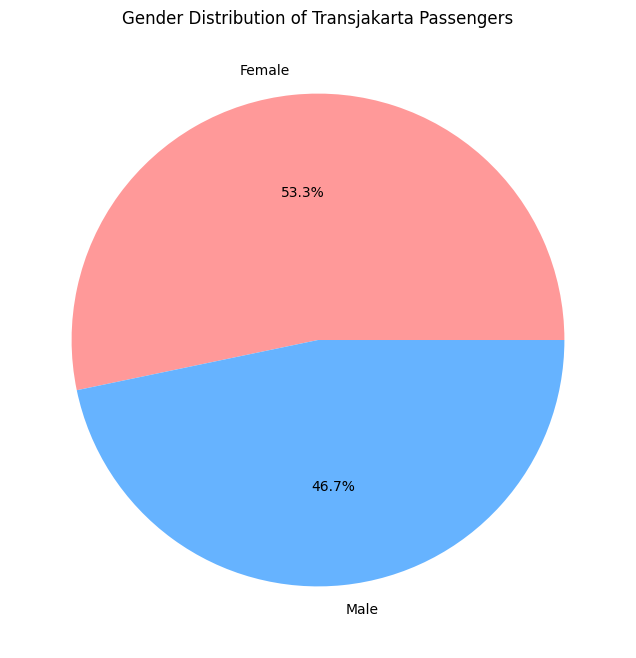


Gender Distribution Chi-Square Test:
Chi-square statistic: 0.00
p-value: 1.0000
Degrees of freedom: 0


In [57]:
plt.figure(figsize=(8, 8))
gender_counts = df['payCardSex'].value_counts()
plt.pie(gender_counts, labels=['Female' if x == 'F' else 'Male' for x in gender_counts.index], 
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Gender Distribution of Transjakarta Passengers')
plt.show()

# Chi-square test for gender distribution
gender_chi2, gender_p, dof, expected = chi2_contingency([gender_counts.values])
print("\nGender Distribution Chi-Square Test:")
print(f"Chi-square statistic: {gender_chi2:.2f}")
print(f"p-value: {gender_p:.4f}")
print(f"Degrees of freedom: {dof}")

Female passengers make up 53.3% of riders. Male passengers account for 46.7% of riders. This represents a relatively balanced gender distribution with a small skew toward female passenger

### **3.2.4 Route preferences by demographic segments**


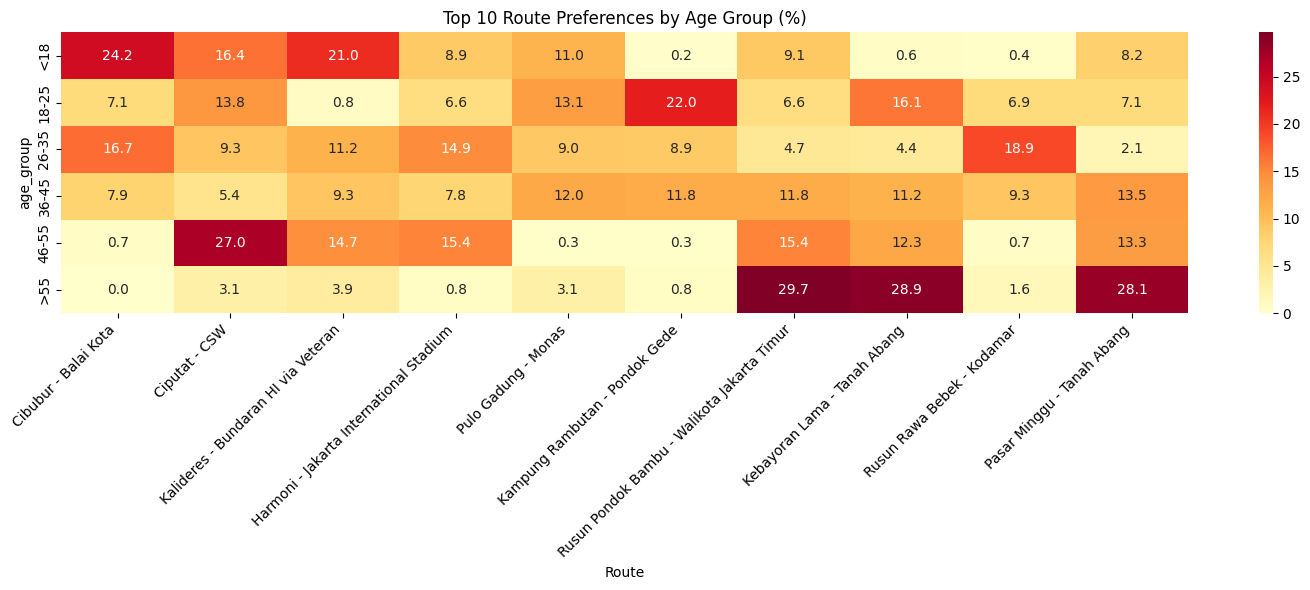

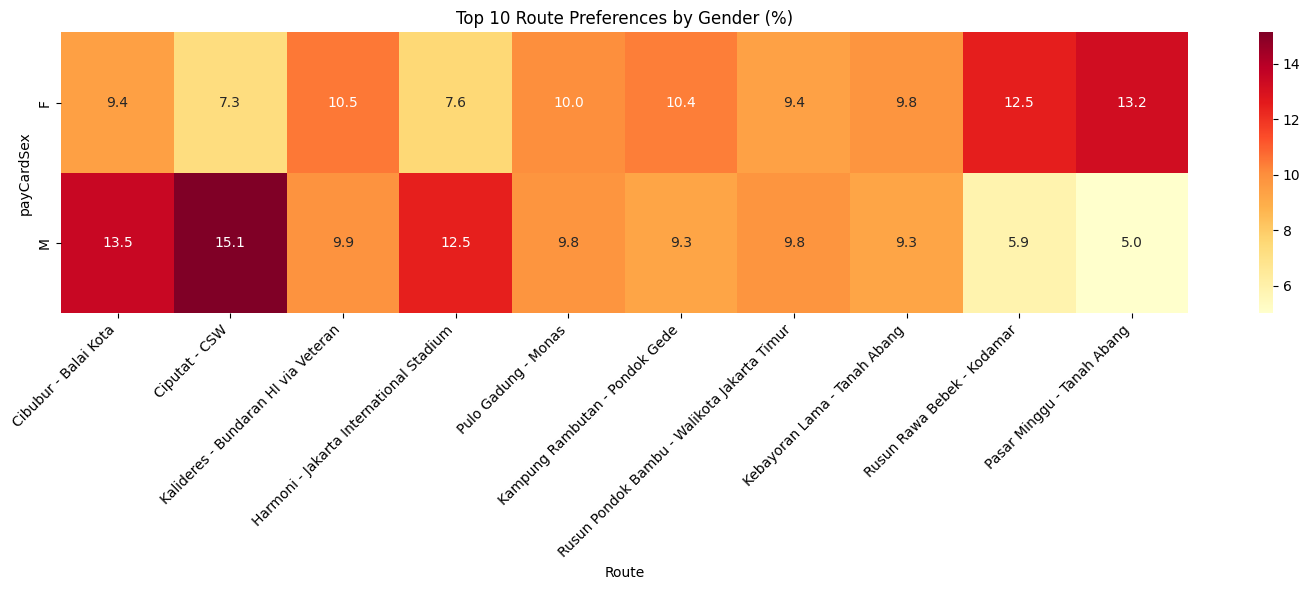

In [58]:
# Age group preferences
plt.figure(figsize=(15, 6))
route_age = pd.crosstab(df['age_group'], df['corridorName'])
top_routes = route_age.sum().nlargest(10).index
route_age_pct = route_age[top_routes].apply(lambda x: x/x.sum() * 100, axis=1)

sns.heatmap(route_age_pct, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Top 10 Route Preferences by Age Group (%)')
plt.xlabel('Route')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gender preferences
plt.figure(figsize=(15, 6))
route_gender = pd.crosstab(df['payCardSex'], df['corridorName'])
top_routes_gender = route_gender.sum().nlargest(10).index
route_gender_pct = route_gender[top_routes_gender].apply(lambda x: x/x.sum() * 100, axis=1)

sns.heatmap(route_gender_pct, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Top 10 Route Preferences by Gender (%)')
plt.xlabel('Route')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top Chart: 

Route Preferences by Age Group (%)

- Younger passengers (<18) strongly prefer Cibubur - Blok Kota (24.2%)
- Middle-aged groups (46-55) show high preference for Cibubur - CSW (27%)
- Older passengers (>55) strongly prefer Ragunan Bamboo - Walikota Jakarta Timur (29.7%) and other routes
- Different age groups show distinct preferences for different routes

Bottom chart: 

Route Preferences by Gender (%)

- Male passengers show stronger preferences for Cibubur - CSW (15.1%) and Cibubur - Blok Kota (13.5%)
- Female passengers have highest preferences for Pasar Jengkol - Tanah Abang (13.2%) and Rutan Pasar Bogor - Kedelmar (12.5%)
- The gender distribution is more balanced for most other routes

### **3.2.5 Travel patterns for different age groups**

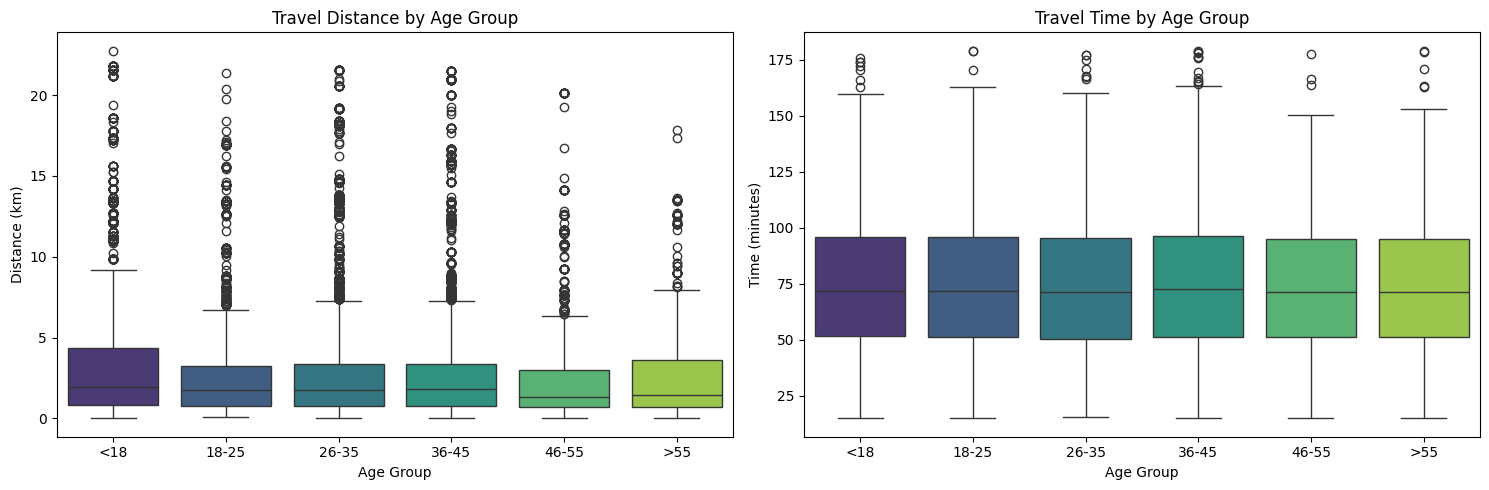

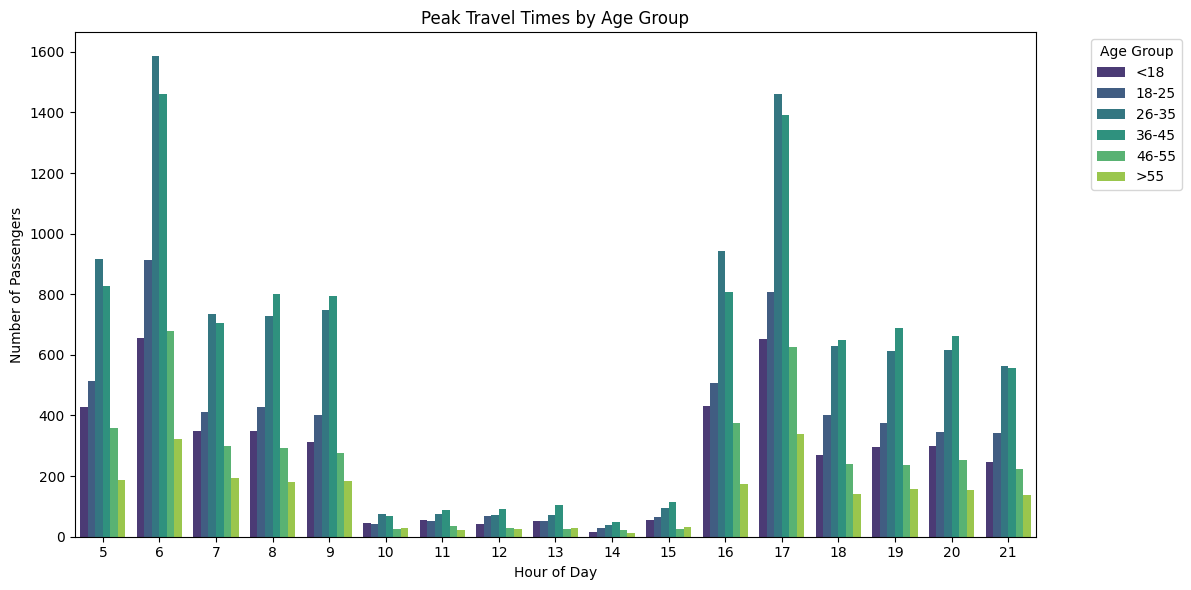


Travel Pattern Summary Statistics:

Average Travel Distance (km) by Age Group:
age_group
<18      3.555980
18-25    2.523302
26-35    2.746108
36-45    2.735559
46-55    2.436741
>55      2.531340
Name: travel_distance, dtype: float64

Average Travel Time (minutes) by Age Group:
age_group
<18      72.307182
18-25    72.198356
26-35    71.603502
36-45    72.624801
46-55    71.956071
>55      72.064159
Name: travel_time, dtype: float64


In [59]:
# Calculate travel distance using coordinates
df['travel_distance'] = np.sqrt(
    (df['tapOutStopsLat'] - df['tapInStopsLat'])**2 + 
    (df['tapOutStopsLon'] - df['tapInStopsLon'])**2
) * 111  # Approximate conversion to kilometers

# Calculate travel time in minutes
df['travel_time'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Travel patterns by age group
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='age_group', y='travel_distance', palette='viridis')
plt.title('Travel Distance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Distance (km)')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='age_group', y='travel_time', palette='viridis')
plt.title('Travel Time by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Time (minutes)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Analysis of peak travel times
df['hour'] = df['tapInTime'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour', hue='age_group', palette='viridis')
plt.title('Peak Travel Times by Age Group')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Passengers')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Summary statistics
print("\nTravel Pattern Summary Statistics:")
print("\nAverage Travel Distance (km) by Age Group:")
print(df.groupby('age_group')['travel_distance'].mean())
print("\nAverage Travel Time (minutes) by Age Group:")
print(df.groupby('age_group')['travel_time'].mean())

Travel Distance and Time Patterns:

- Most trips are relatively short, with median distances around 2-4 km across all age groups
- Travel times typically range between 50-100 minutes for most passengers
- There are some outlier trips with distances over 15 km and times over 150 minutes across all age groups


Peak Hours:

- Morning peak at 6:00 (highest spike of ~1600 passengers)
- Evening peak at 16:00-17:00 (second highest spike of ~1400 passengers)

    - The 26-35 age group dominates both peak periods
    - Very low passenger during midday hours (10:00-15:00)


Age-Based Travel Behaviors:

- Working-age groups (26-35 and 36-45) show the strongest peak-hour travel patterns
- Younger riders (<18 and 18-25) have more distributed travel times throughout the day
- Older age groups (>55) consistently show lower passenger across all hours
- Early morning passenger (5:00-9:00) is higher than evening passenger (17:00-21:00)

## **3.3 Payment Analysis**

### **3.3.1 Payment Types Distribution**

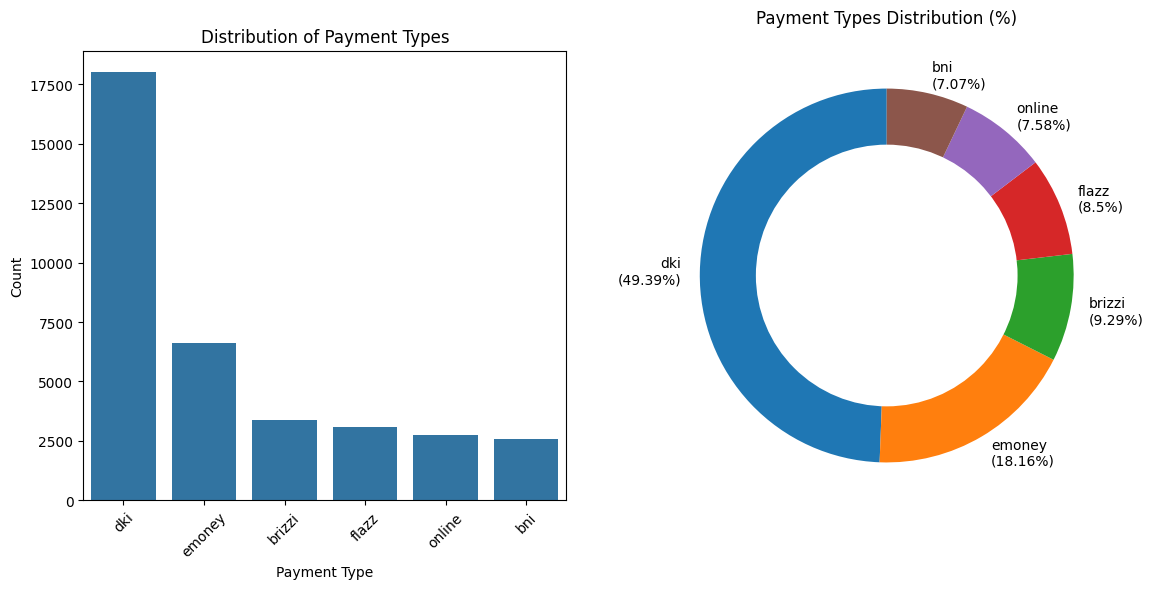

In [60]:
plt.figure(figsize=(12, 6))
payment_dist = df['payCardBank'].value_counts()
plt.subplot(1, 2, 1)
sns.barplot(x=payment_dist.index, y=payment_dist.values)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

payment_pct = (payment_dist / len(df) * 100).round(2)

# Create the pie chart
plt.subplot(1, 2, 2)
plt.pie(payment_pct, 
        labels=[f"{idx}\n({val}%)" for idx, val in payment_pct.items()],
        startangle=90)  # Removed autopct parameter

# Add a circle at the center to create the donut hole
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Payment Types Distribution (%)', pad=20)
plt.axis('equal')  
plt.tight_layout()

- dki is overwhelmingly the most popular payment method, accounting for nearly half (49.39%) of all transactions
- emoney is the second most popular method at 18.16% (about 6,500 transactions)
- brizzi, flazz, online, and bni each capture less than 10% market share

### **3.3.2 Revenue Analysis by Top 10 Routes**

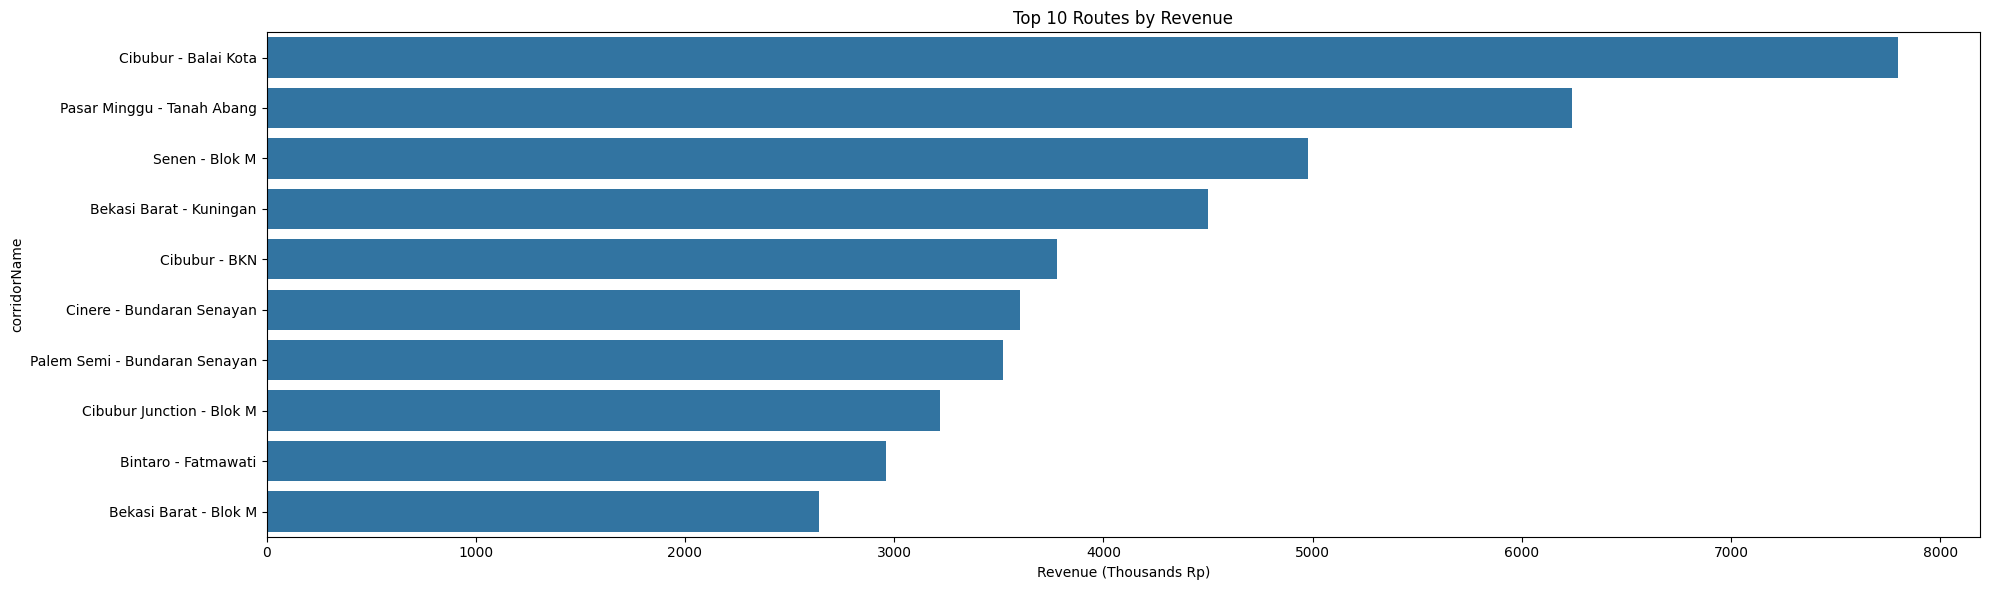

In [61]:
# Create a figure with two subplots side by side
plt.figure(figsize=(20, 6))

# First subplot - Top 10 Routes
route_revenue = df.groupby('corridorName')['payAmount'].sum().sort_values(ascending=False)
top_10_routes = route_revenue.head(10)
sns.barplot(x=top_10_routes.values/1000, y=top_10_routes.index)
plt.title('Top 10 Routes by Revenue')
plt.xlabel('Revenue (Thousands Rp)')
plt.tight_layout();

Top Revenue Routes:

- Cibubur - Balai Kota is the highest revenue generator at around Rp8,000,000 
- Pasar Minggu - Tanah Abang is second with approximately Rp7,500,000
- Senen - Blok M ranks third with about Rp 6,000,000 


Revenue Distribution:

- There's a significant gap between the top 3 routes and the others
- The bottom routes (like Bekasi Barat - Blok M) generate about half the revenue of the top route
- Most routes generate between Rp3,000,000 to 5,000,000


Geographic Patterns:

- Routes connecting to major commercial areas (Balai Kota, Tanah Abang, Blok M) tend to generate higher revenue
- Several routes involving Cibubur appear in the list, suggesting it's a significant transit hub

### **3.3.2 Payment Method Preferences by Gender & Age Group**

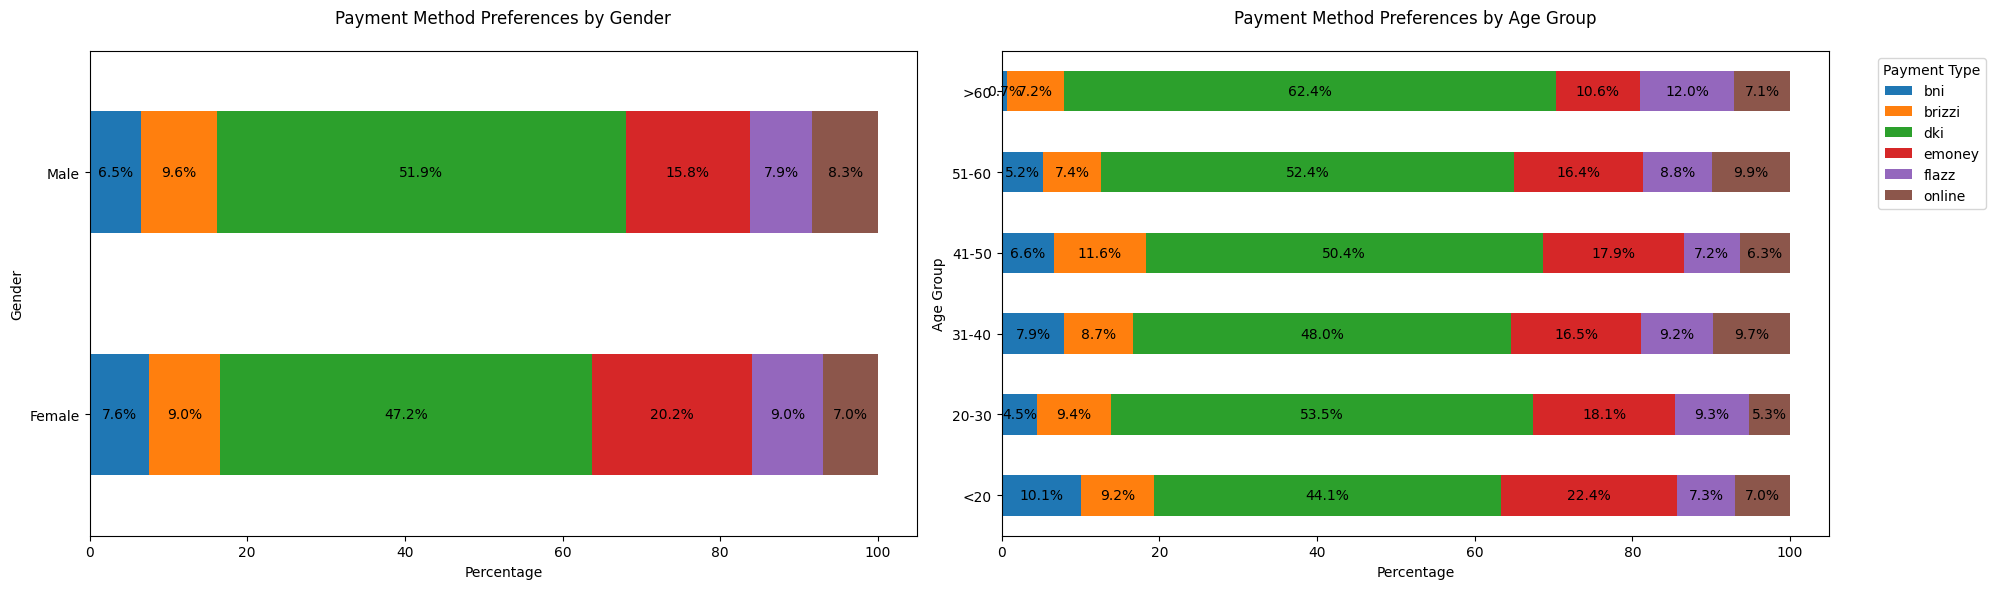

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Prepare gender data
# Replace F and M with Female and Male
df['gender'] = df['payCardSex'].map({'F': 'Female', 'M': 'Male'})
gender_payment = pd.crosstab(df['gender'], df['payCardBank'], normalize='index') * 100

# Gender Analysis
gender_payment.plot(kind='barh', stacked=True, ax=ax1)
ax1.set_title('Payment Method Preferences by Gender', pad=20, size=12)
ax1.set_xlabel('Percentage')
ax1.set_ylabel('Gender')
ax1.legend().remove()

# Add percentage labels on the gender bars
for c in ax1.containers:
    ax1.bar_label(c, fmt='%.1f%%', label_type='center') # Add labels with one decimal place

# Age Analysis
current_year = 2023
df['age'] = current_year - df['payCardBirthDate']
df['age_group'] = pd.cut(df['age'],
                        bins=[0, 20, 30, 40, 50, 60, 100],
                        labels=['<20', '20-30', '31-40', '41-50', '51-60', '>60'])

age_payment = pd.crosstab(df['age_group'], df['payCardBank'], normalize='index') * 100
age_payment.plot(kind='barh', stacked=True, ax=ax2)
ax2.set_title('Payment Method Preferences by Age Group', pad=20, size=12)
ax2.set_xlabel('Percentage')
ax2.set_ylabel('Age Group')
ax2.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels on the age group bars
for c in ax2.containers:
    ax2.bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

- dki is consistently the most popular payment method across all demographics
- Younger age groups show more diverse payment method preferences
- The elderly (>60) show the strongest preference for a single payment method (dki)
- brizzi and bni maintain relatively stable usage rates across all demographics

* **
# **4. Conclusion and Recommendation**
* **

## **4.1 Conclusion**

1. Passenger Patterns:

TransJakarta exhibits distinct commuting patterns with peak hours concentrated during typical work commute times - early morning (6-9 AM) and evening (4-7 PM). The contrast between weekday and weekend usage, where weekday passenger is four times higher than weekends, clearly indicates that the system primarily serves commuters. This shows BRT as the backbone of the system, handling over half of all rides, while Mikrotrans serves as an effective feeder service.

2. Demographics of the passenger:

The core user base consists predominantly of working-age adults between 26-45 years old, reflecting its role in serving the working population's transportation needs. The relatively balanced gender distribution, with a slight skew towards female riders (53.3%), suggests that the system is perceived as safe and accessible by all users. The significant presence of younger riders (18-25 age group) indicates strong adoption among students and young professionals, though there's notably lower usage among seniors.

3. Payment & Operations:

The payment types is dominated by the DKI card, which accounts for nearly half of all transactions, followed by e-money at about one-fifth of payments. The typical journey patterns show most trips are relatively short (2-4 km) but take between 50-100 minutes.

4. Route Performance:

Cibubur - Balai Kota is the most popular route serving approximately 390 passengers. Revenue generation aligns closely with passenger patterns, with routes connecting to major commercial areas generating the highest revenue. The tap-in/tap-out data shows concentrated usage at specific stops like Penjaringan and BKN. 

## **4.2 Recommendation**

1. The TransJakarta Loyalty Program

    - A point-reward system, that operates on a multiplier structure where passengers earn different point values based on their travel timing and age. During peak commuting hours (6-9 AM and 4-7 PM), all passengers earn double points on their rides, providing a baseline reward for regular commuters. 
    - Travel during off-peak weekday hours is incentivized with 5 times the regular points, while weekend travelers earn the highest multiplier of 10 times points. 
    - The program includes a special focus on students, where those aged 25 and under receive an additional 5 times point on all their rides, regardless of travel time. 
    - These accumulated points can be redeemed through a diverse partnership network. Within transit hubs, passengers can use their points at coffee shops and food courts. The entire system would be integrated with existing application of JakOneMobile for the DKI card, for convenient point tracking and redemption.

2. Transjakarta Leisure Route

    - The data shows a significant drop in weekend ridership (70-75% lower than weekdays), indicating a major opportunity to transform TransJakarta into a transportation solution for leisure activities. For family entertainment, TransJakarta should prioritize partnerships with major attractions like Taman Mini Indonesia Indah, leveraging the already high traffic at the Garuda Taman Mini stop. 
    - The system is a family packages that combine transportation and attraction entry fees, particularly targeting the weekend market. This could be complemented by "Family Pass" promotional rates and special express routes connecting multiple family-friendly destinations like Ragunan Zoo, museums, and parks. The presence of younger riders (18-25 age group) and significant under-18 ridership during weekdays suggests there's already a foundation of youth ridership.

3. Express Lane Service

    - This service introduces an express routes along TransJakarta's highest-revenue corridors: Cibubur - Balai Kota (Rp8,000,000 revenue), Pasar Minggu - Tanah Abang (Rp7,500,000 revenue), and Senen - Blok M (Rp6,000,000 revenue). 
    - Instead of serving all stops, the express service would only stop at major hubs where the data shows highest tap-in/tap-out activity like Penjaringan (235 taps) and Garuda Taman Mini (203 taps), dramatically reducing travel times during peak hours.

In [63]:
# Save the Final csv for Tableau
df.to_csv("Transjakarta_final.csv")